In [ ]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd

In [ ]:
#1 Viết hàm load_data() để tải dữ liệu lên ứng dụng. Sau đó, hiển thị ra màn hình 10 dòng đầu tiên.

df =pd.read_csv('titanic_disaster.csv')

In [ ]:
df.head(10)

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S
5,6,0,3,"Moran, Mr. James",male,NaN,0,0,330877,8.4583,NaN,Q
6,7,0,1,"McCarthy, Mr. Timothy J",male,54.0,0,0,17463,51.8625,E46,S
7,8,0,3,"Palsson, Master. Gosta Leonard",male,2.0,3,1,349909,21.0750,NaN,S
8,9,1,3,"Johnson, Mrs. Oscar W (Elisabeth Vilhelmina Berg)",female,27.0,0,2,347742,11.1333,NaN,S
9,10,1,2,"Nasser, Mrs. Nicholas (Adele Achem)",female,14.0,1,0,237736,30.0708,NaN,C


In [ ]:
import seaborn as sns


In [14]:
#3 Xử lý tên cột tên Name, tách ra làm 2 cột: firstName và secondName. Lưu ý: Sau khi tách cột xong thì xóa luôn cột Name


# tách cột 'name' ra 2 cột 'firstname' 'seconename'
df[['firstName', 'secondName']] = df['Name'].str.split(',', expand=True)

# gọi dữ liệu cột name
df.drop('Name', axis=1, inplace=True)

# in ra
print(df.head())


   PassengerId  Survived  Pclass     Sex   Age  SibSp  Parch  \
0            1         0       3    male  22.0      1      0   
1            2         1       1  female  38.0      1      0   
2            3         1       3  female  26.0      0      0   
3            4         1       1  female  35.0      1      0   
4            5         0       3    male  35.0      0      0   

             Ticket     Fare Cabin Embarked  firstName  \
0         A/5 21171   7.2500   NaN        S     Braund   
1          PC 17599  71.2833   C85        C    Cumings   
2  STON/O2. 3101282   7.9250   NaN        S  Heikkinen   
3            113803  53.1000  C123        S   Futrelle   
4            373450   8.0500   NaN        S      Allen   

                                    secondName  
0                              Mr. Owen Harris  
1   Mrs. John Bradley (Florence Briggs Thayer)  
2                                  Miss. Laina  
3           Mrs. Jacques Heath (Lily May Peel)  
4                    

In [15]:
#4 Xứ lý rút gọn kích thước dữ liệu trên cột Sex như sau: thay thế male  M và female  F 
#Thay 'male' thành 'M' và 'female' thành 'F' trong cột 'sex'
df['Sex'] = df['Sex'].replace({'male': 'M', 'female': 'F'})
# xuất dữ liệu ra
print(df['Sex'].head())


0    M
1    F
2    F
3    F
4    M
Name: Sex, dtype: object


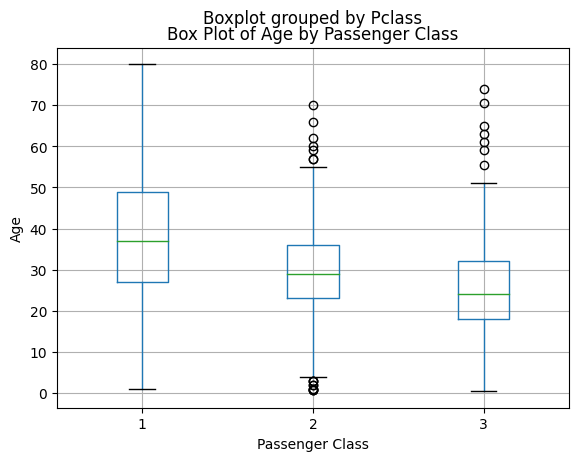

In [16]:
#5 Xử lý dữ liệu thiếu trên biến Age bằng cách thay thế bằng giá trị trung bình tuổi: Hãy đưa ra quyết định dùng giá trị trung bình tuổi toàn bộ hành khách hay theo từng nhóm hạng vé (hạng hành khách: Pclass). Ta tiến hành làm các bước sau
#a. Sử dụng Seaborn để vẽ biểu đồ (Box plot) trực quan dữ liệu để xác định phân hối tuổi trên từng hạng hành khách. Nhận xét về tuổi trung bình giữa các nhóm hành khách. Từ đó đưa ra quyết định cách thay thế giá trị tuổi bị thiếu.
#b. Tiến hành thay thế giá trị Age bị thiếu. Sau đó, hiển thị kết quả dạng bảng và trực quan dữ liệu đã xử lý thiếu cho cột‘Age‘ bằng biểu đồ Heat map.
df.boxplot(column='Age', by='Pclass')    #Tạo biểu đồ hộp
plt.title('Box Plot of Age by Passenger Class')  #Đặt tiêu đề cho biểu đồ
plt.xlabel('Passenger Class')   #Xác định nhãn cho trục x
plt.ylabel('Age') #xác định nhãn cho trục x
plt.show() #In biểu đồ ra


In [17]:
# b Tiến hành thay thế giá trị Age bị thiếu. Sau đó, hiển thị kết quả dạng bảng và trực quan dữ liệu đã xử lý thiếu cho cột‘Age‘ bằng biểu đồ Heat map.
df['Age'] = df.groupby('Pclass')['Age'].transform(lambda x: x.fillna(x.mean())) #điền giá trị thiếu (NaN) trong cột "Tuổi" bằng cách sử dụng chiến lược bù đắp trung bình theo nhóm
missing_data = df.isnull().sum() #tính tổng số giá trị thiếu (NaN) trong mỗi cột của DataFrame
print("Missing data per column:") #in thông báo "Dữ liệu thiếu trên mỗi cột:" ra bảng điều khiển
print(missing_data)# Xuất dữ liệu

Missing data per column:
PassengerId      0
Survived         0
Pclass           0
Sex              0
Age              0
SibSp            0
Parch            0
Ticket           0
Fare             0
Cabin          687
Embarked         2
firstName        0
secondName       0
dtype: int64


In [18]:
#6 Xây dựng biến số Agegroup có thang đo thứ tự được ánh xạ theo thang đo khoảng dựa trên độ tuổi của hành khách như sau: (age =< 12]  Kid; (12, 18]: Teen, (18, 60]: Adult và ( age > 60): Older
df['AgeGroup'] = pd.cut(df['Age'], bins=[0, 12, 18, 60, float('inf')], labels=['Kid', 'Teen', 'Adult', 'Older'])
# Dòng này tạo một cột mới có tên 'AgeGroup' trong DataFrame df.
# pd.cut(df['Age'], bins=[0, 12, 18, 60, float('inf')], labels=['Kid', 'Teen', 'Adult', 'Older']): Phần này sử dụng hàm pandas.cut để phân loại độ tuổi thành các nhóm dựa trên các phạm vi và nhãn được xác định. Dưới đây là phân tích:
# df['Age']: Chỉ định cột chứa giá trị độ tuổi cần được phân loại ('Age').
# bins=[0, 12, 18, 60, float('inf')]: Xác định các cạnh thùng cho phân loại. Độ tuổi sẽ được phân loại vào các phạm vi này:
# Từ 0 đến 11 tuổi (bao gồm)
# Từ 12 đến 17 tuổi (bao gồm)
# Từ 18 đến 59 tuổi (bao gồm)
# 60 tuổi trở lên
# labels=['Kid', 'Teen', 'Adult', 'Older']: Gán nhãn cho mỗi nhóm tuổi ('Kid', 'Teen', 'Adult', 'Older').
df.head()


,PassengerId,Survived,Pclass,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked,firstName,secondName,AgeGroup
0,1,0,3,M,22.0,1,0,A/5 21171,7.2500,NaN,S,Braund,Mr. Owen Harris,Adult
1,2,1,1,F,38.0,1,0,PC 17599,71.2833,C85,C,Cumings,Mrs. John Bradley (Florence Briggs Thayer),Adult
2,3,1,3,F,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S,Heikkinen,Miss. Laina,Adult
3,4,1,1,F,35.0,1,0,113803,53.1000,C123,S,Futrelle,Mrs. Jacques Heath (Lily May Peel),Adult
4,5,0,3,M,35.0,0,0,373450,8.0500,NaN,S,Allen,Mr. William Henry,Adult


In [19]:
#7 Tiến hành thêm đặc trưng về danh xưng (namePrefix) trong xã hội bằng cách tách Mr, Mrs, Miss, Master ra khỏi ―secondName‖
df['namePrefix'] = df['secondName'].str.extract('([A-Za-z]+)\.', expand=False)
df['secondName'].str.extract('([A-Za-z]+)\.', expand=False):

# Phần này áp dụng phương thức str.extract() cho cột 'secondName' trong DataFrame df. Phương thức str.extract() được sử dụng để trích xuất chuỗi con dựa trên biểu thức chính quy.

# Biểu thức chính quy được sử dụng ở đây là '([A-Za-z]+)\.':

# '([A-Za-z]+)': Nhóm này bắt giữ một hoặc nhiều ký tự chữ hoa hoặc chữ thường ([A-Za-z]), tạo thành một nhóm.
# '\.': Phù hợp với ký tự dấu chấm ('.') theo nghĩa đen.
# Tham số expand=False cho biết các giá trị trích xuất nên được lưu trữ trong một cột duy nhất ('namePrefix') thay vì nhiều cột.

#  df['namePrefix'] = ...:

# Dòng này gán các giá trị trích xuất (được biểu thị bằng biểu thức bên phải) cho một cột mới có tên 'namePrefix' trong DataFrame df.
df.head() #in

,PassengerId,Survived,Pclass,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked,firstName,secondName,AgeGroup,namePrefix
0,1,0,3,M,22.0,1,0,A/5 21171,7.2500,NaN,S,Braund,Mr. Owen Harris,Adult,Mr
1,2,1,1,F,38.0,1,0,PC 17599,71.2833,C85,C,Cumings,Mrs. John Bradley (Florence Briggs Thayer),Adult,Mrs
2,3,1,3,F,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S,Heikkinen,Miss. Laina,Adult,Miss
3,4,1,1,F,35.0,1,0,113803,53.1000,C123,S,Futrelle,Mrs. Jacques Heath (Lily May Peel),Adult,Mrs
4,5,0,3,M,35.0,0,0,373450,8.0500,NaN,S,Allen,Mr. William Henry,Adult,Mr


In [21]:
#8 Khai thác thêm thông tin số lượng thành viên đi theo nhóm thân quen (familySize) đối với mỗi hành khách trên chuyến hải trình; family size = 1+ SibSp + Parch
df['familySize'] = 1 + df['SibSp'] + df['Parch']
# df['familySize'] = ...:
# Dòng này gán giá trị cho một cột mới có tên 'familySize' trong DataFrame df.
#  1 + df['SibSp'] + df['Parch']:
# Biểu thức bên tay phải đại diện cho các giá trị sẽ được gán cho cột 'familySize'. Nó là sự kết hợp của hằng số 1 và các giá trị từ hai cột hiện có: 'SibSp' và 'Parch'.
# 'SibSp': Cột này có khả năng đại diện cho số lượng anh chị em ruột và vợ/chồng của mỗi hành khách.
# 'Parch': Cột này có khả năng đại diện cho số lượng cha mẹ và con cái của mỗi hành khách.
df.head() #in

,PassengerId,Survived,Pclass,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked,firstName,secondName,AgeGroup,namePrefix,familySize
0,1,0,3,M,22.0,1,0,A/5 21171,7.2500,NaN,S,Braund,Mr. Owen Harris,Adult,Mr,2
1,2,1,1,F,38.0,1,0,PC 17599,71.2833,C85,C,Cumings,Mrs. John Bradley (Florence Briggs Thayer),Adult,Mrs,2
2,3,1,3,F,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S,Heikkinen,Miss. Laina,Adult,Miss,1
3,4,1,1,F,35.0,1,0,113803,53.1000,C123,S,Futrelle,Mrs. Jacques Heath (Lily May Peel),Adult,Mrs,2
4,5,0,3,M,35.0,0,0,373450,8.0500,NaN,S,Allen,Mr. William Henry,Adult,Mr,1


In [22]:
#9 Tạo thêm đặc trưng ‗Alone‘ để xác định hành khách đi theo nhóm hay cá nhân bằng cách dựa trên familySize như sau: Nếu familySize = 0 thì giá trị Alone = 1 và ngược lại là 0.
df['Alone'] = np.where(df['familySize'] == 0, 1, 0)
df['Alone']: Phần này gán một cột mới có tên 'Alone' cho DataFrame df.

#np.where(): Hàm NumPy này nhận ba đối số và hoạt động như sau:
# condition: Đối số đầu tiên (df['familySize'] == 0) là một điều kiện Boolean cần kiểm tra.
# Trong trường hợp này, nó kiểm tra xem giá trị trong cột 'familySize' có bằng 0 hay không (cho biết kích thước gia đình là 0).
# x: Đối số thứ hai (1) chỉ định giá trị cần gán nếu điều kiện là True.
# Ở đây, nó gán 1 nếu hành khách đi du lịch một mình.
# y: Đối số thứ ba (0) chỉ định giá trị cần gán nếu điều kiện là False.
# Ở đây, nó gán 0 nếu hành khách không đi du lịch một mình (tức là có kích thước gia đình lớn hơn 0).
# Cột 'Alone' mới được tạo này có thể được sử dụng cho phân tích sâu hơn hoặc kỹ thuật tạo tính năng
# liên quan đến tác động của việc đi du lịch một mình đối với các biến khác trong tập dữ liệu.
# Ví dụ: nó có thể được sử dụng để kiểm tra tỷ lệ sống sót hoặc giá vé dựa trên việc hành khách đi du lịch một mình hay không.




df.head() #Xuất dữ liệu

,PassengerId,Survived,Pclass,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked,firstName,secondName,AgeGroup,namePrefix,familySize,Alone
0,1,0,3,M,22.0,1,0,A/5 21171,7.2500,NaN,S,Braund,Mr. Owen Harris,Adult,Mr,2,0
1,2,1,1,F,38.0,1,0,PC 17599,71.2833,C85,C,Cumings,Mrs. John Bradley (Florence Briggs Thayer),Adult,Mrs,2,0
2,3,1,3,F,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S,Heikkinen,Miss. Laina,Adult,Miss,1,0
3,4,1,1,F,35.0,1,0,113803,53.1000,C123,S,Futrelle,Mrs. Jacques Heath (Lily May Peel),Adult,Mrs,2,0
4,5,0,3,M,35.0,0,0,373450,8.0500,NaN,S,Allen,Mr. William Henry,Adult,Mr,1,0


In [23]:
# 10 Tiến hành tách loại cabin (typeCabin) mà hành khách ở để lọc và phân tích đặc tính cabin. Loại cabin được kí hiệu bởi chữ cái đầu tiên. Lưu ý: Đối với dữ liệu cabin bị thiếu thì thay thế bằng ―Unknown‖
df['typeCabin'] = df['Cabin'].str[0]
# df['Cabin'].str[0]: Phần này trích xuất ký tự đầu tiên (chỉ mục 0) của mỗi giá trị trong cột 'Cabin'.
# Trình truy cập str cung cấp khả năng thao tác chuỗi và [0] biểu thị việc lập chỉ mục ký tự đầu tiên.
# df['typeCabin'] = df['typeCabin'].fillna('Unknown') df['typeCabin'].fillna('Unknown'): Dòng này thay thế bất kỳ giá trị nào bị thiếu (được biểu thị bằng NaN) trong cột 'typeCabin' bằng chuỗi 'Unknown'.
# Phương thức fillna() được sử dụng cho mục đích này và nó lấy giá trị 'Unknown' làm giá trị thay thế cho giá trị NaN.
df.head() #Xuất dữ liệu

,PassengerId,Survived,Pclass,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked,firstName,secondName,AgeGroup,namePrefix,familySize,Alone,typeCabin
0,1,0,3,M,22.0,1,0,A/5 21171,7.2500,NaN,S,Braund,Mr. Owen Harris,Adult,Mr,2,0,Unknown
1,2,1,1,F,38.0,1,0,PC 17599,71.2833,C85,C,Cumings,Mrs. John Bradley (Florence Briggs Thayer),Adult,Mrs,2,0,C
2,3,1,3,F,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S,Heikkinen,Miss. Laina,Adult,Miss,1,0,Unknown
3,4,1,1,F,35.0,1,0,113803,53.1000,C123,S,Futrelle,Mrs. Jacques Heath (Lily May Peel),Adult,Mrs,2,0,C
4,5,0,3,M,35.0,0,0,373450,8.0500,NaN,S,Allen,Mr. William Henry,Adult,Mr,1,0,Unknown
